In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

## Direct Method

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 2156.5023121809013, RMSE: 46.43815577928242


## Cross-validation Techniques

In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

### Holdout Method with Batch Gradient Descent

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 64.3013
Iteration  200 | Loss = 64.0463
Iteration  300 | Loss = 64.0173
Iteration  400 | Loss = 64.0136
Iteration  500 | Loss = 64.0131
Iteration  600 | Loss = 64.0130
Iteration  700 | Loss = 64.0130
Iteration  800 | Loss = 64.0130
Iteration  900 | Loss = 64.0130
Iteration 1000 | Loss = 64.0130
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2502.286660765953, RMSE: 50.02286138123201
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.2344
Iteration  200 | Loss = 62.3493
Iteration  300 | Loss = 61.6122
Iteration  400 | Loss = 61.3053
Iteration  500 | Loss = 61.1396
Iteration  600 | Loss = 61.0415
Iteration  700 | Loss = 60.9819
Iteration  800 | Loss = 60.9454
Iteration  900 | Loss = 60.9229
Iteration 1000 | Loss = 60.9091
Fitting 

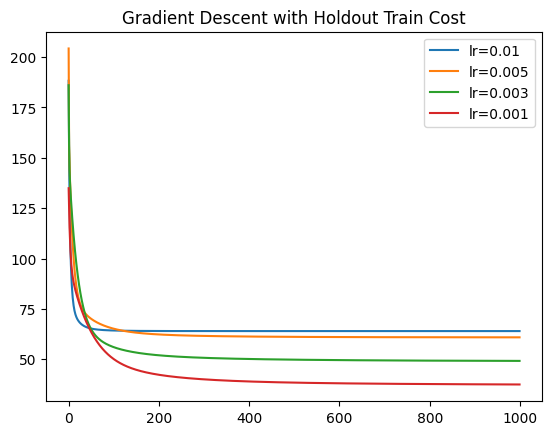

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 50.02286138123201, 'lr': 0.01, 'w': array([-48.96047502,  45.96031304, 191.7194419 , 375.46229763,
       173.00978086, -51.06427008, 297.64411378])}


### Holdout Method with Stochastic Gradient Descent

In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 40.8474
Iteration  200 | Loss = 40.6570
Iteration  300 | Loss = 40.6210
Iteration  400 | Loss = 40.6115
Iteration  500 | Loss = 40.6086
Iteration  600 | Loss = 40.6077
Iteration  700 | Loss = 40.6073
Iteration  800 | Loss = 40.6071
Iteration  900 | Loss = 40.6071
Iteration 1000 | Loss = 40.6070
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 15134.82218352574, RMSE: 123.02366513612631
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 52.1028
Iteration  200 | Loss = 50.8989
Iteration  300 | Loss = 50.7118
Iteration  400 | Loss = 50.6691
Iteration  500 | Loss = 50.6562
Iteration  600 | Loss = 50.6515
Iteration  700 | Loss = 50.6497
Iteration  800 | Loss = 50.6490
Iteration  900 | Loss = 50.6488
Iteration 1000 | Loss = 50.64

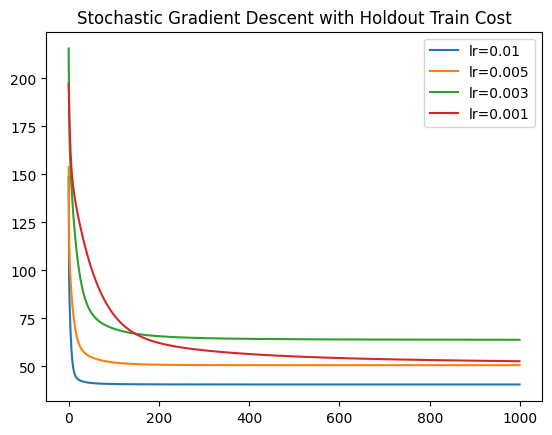

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 49.59188761666276, 'lr': 0.003, 'w': array([-53.46540241,  72.55418437, 431.28311628, 422.92144096,
       197.09214199, -32.49578561, 247.93277729])}


### Monte Carlo Cross-Validation with Batch Gradient Descent

In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.6057
Iteration  200 | Loss = 60.5970
Iteration  300 | Loss = 60.2597
Iteration  400 | Loss = 60.1333
Iteration  500 | Loss = 60.0858
Iteration  600 | Loss = 60.0679
Iteration  700 | Loss = 60.0612
Iteration  800 | Loss = 60.0587
Iteration  900 | Loss = 60.0577
Iteration 1000 | Loss = 60.0574
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4019.2615418121873, RMSE: 63.39764618510838
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 47.6117
Iteration  200 | Loss = 46.2482
Iteration  300 | Loss = 45.8054
Iteration  400 | Loss = 45.6587
Iteration  500 | Loss = 45.6102
Iteration  600 | Loss = 45.5941
Iteration  700 | Loss = 45.5889
Iteration  800 | Loss = 45.5871
Iteration  900 | Loss = 45.5865
Iteration 1000 | Loss = 45.5864
Fitt

In [15]:
print(gd_montc_opt_model)

{'rmse': 56.82050022944729, 'lr': 0.003, 'w': array([-50.95570599,  67.35564006, 494.71172182, 345.87873065,
       157.14082741,  19.51851032, 241.00569134])}


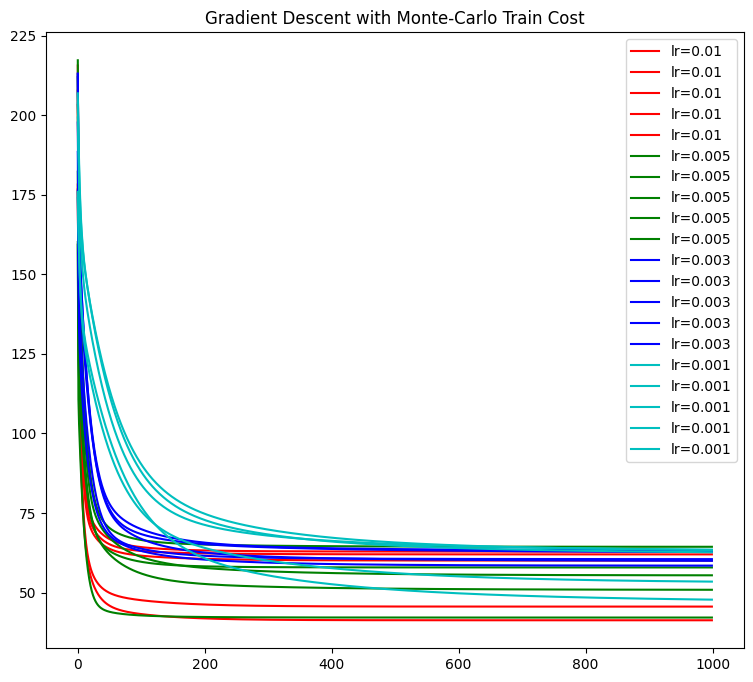

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

### Monte Carlo Cross-Validation with Stochastic Gradient Descent

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 59.8776
Iteration  200 | Loss = 58.1723
Iteration  300 | Loss = 57.4761
Iteration  400 | Loss = 57.1804
Iteration  500 | Loss = 57.0539
Iteration  600 | Loss = 56.9999
Iteration  700 | Loss = 56.9771
Iteration  800 | Loss = 56.9676
Iteration  900 | Loss = 56.9638
Iteration 1000 | Loss = 56.9623
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 6720.165842336169, RMSE: 81.97661765611075
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 60.5016
Iteration  200 | Loss = 59.5704
Iteration  300 | Loss = 59.3469
Iteration  400 | Loss = 59.2859
Iteration  500 | Loss = 59.2710
Iteration  600 | Loss = 59.2688
Iteration  700 | Loss = 59.2695
Iteration  800 | Loss = 59.2706
Iteration  900 | Loss = 59.2714
Iteration 1000 | Loss = 59.

In [18]:
print(sgd_montc_opt_model)

{'rmse': 64.5553299393828, 'lr': 0.01, 'w': array([-50.47044858,  80.24769438, 503.08411034, 369.92621648,
       173.41758836, -23.34275881, 293.99809976])}


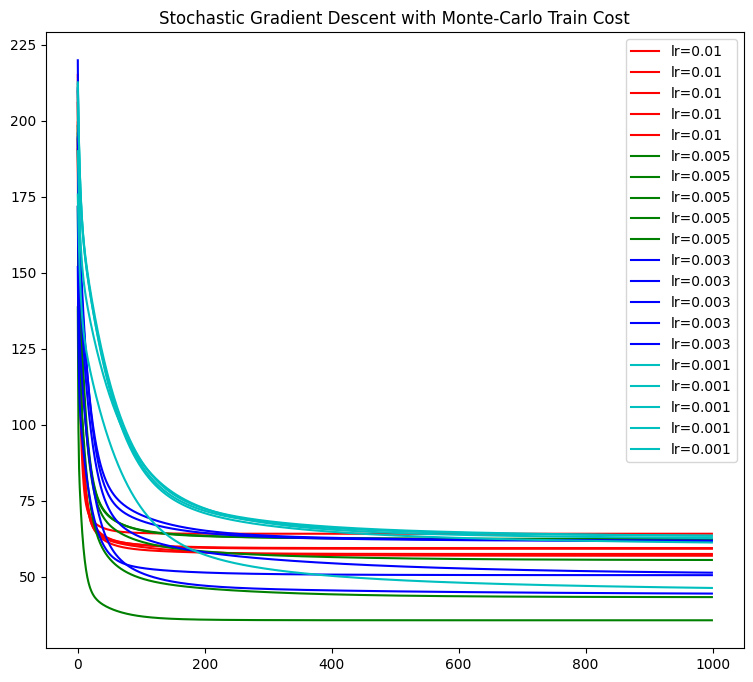

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

### K-Fold Cross-Validation with Batch Gradient Descent

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 51.1902
Iteration  200 | Loss = 50.5221
Iteration  300 | Loss = 50.3721
Iteration  400 | Loss = 50.3350
Iteration  500 | Loss = 50.3256
Iteration  600 | Loss = 50.3233
Iteration  700 | Loss = 50.3227
Iteration  800 | Loss = 50.3225
Iteration  900 | Loss = 50.3225
Iteration 1000 | Loss = 50.3224
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 9818.81936192581, RMSE: 99.08995590838565
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.4169
Iteration  200 | Loss = 61.7754
Iteration  300 | Loss = 61.5716
Iteration  400 | Loss = 61.5022
Iteration  500 | Loss = 61.4785
Iteration  600 | Loss = 61.4704
Iteration  700 | Loss = 61.4677
Iteration  800 | Loss = 61.4667
Iteration  900 | Loss = 61.4664
Iteration 1000 | Loss = 61.4663
Fitting com

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  700 | Loss = 59.0052
Iteration  800 | Loss = 59.0050
Iteration  900 | Loss = 59.0049
Iteration 1000 | Loss = 59.0049
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3795.383803405009, RMSE: 61.60668635306568
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.9828
Iteration  200 | Loss = 59.3881
Iteration  300 | Loss = 59.2645
Iteration  400 | Loss = 59.2318
Iteration  500 | Loss = 59.2229
Iteration  600 | Loss = 59.2204
Iteration  700 | Loss = 59.2197
Iteration  800 | Loss = 59.2195
Iteration  900 | Loss = 59.2195
Iteration 1000 | Loss = 59.2194
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3626.194366359783, RMSE: 60.217890749840976
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 60.5125
Iteration  200 | Loss = 60.3417
Iteration  300 | Loss = 60.33

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  600 | Loss = 61.2709
Iteration  700 | Loss = 61.2512
Iteration  800 | Loss = 61.2408
Iteration  900 | Loss = 61.2353
Iteration 1000 | Loss = 61.2324
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2661.055537758707, RMSE: 51.58541981760648
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 50.8413
Iteration  200 | Loss = 48.6130
Iteration  300 | Loss = 48.0132
Iteration  400 | Loss = 47.7296
Iteration  500 | Loss = 47.5778
Iteration  600 | Loss = 47.4947
Iteration  700 | Loss = 47.4492
Iteration  800 | Loss = 47.4242
Iteration  900 | Loss = 47.4104
Iteration 1000 | Loss = 47.4029
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 11688.65813020716, RMSE: 108.11409774033709
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.1605
Iteration  200 | Loss = 61.

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  400 | Loss = 56.7505
Iteration  500 | Loss = 56.7359
Iteration  600 | Loss = 56.7321
Iteration  700 | Loss = 56.7312
Iteration  800 | Loss = 56.7309
Iteration  900 | Loss = 56.7308
Iteration 1000 | Loss = 56.7308
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5004.367283764108, RMSE: 70.74155273786481
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 64.2055
Iteration  200 | Loss = 61.4449
Iteration  300 | Loss = 60.6669
Iteration  400 | Loss = 60.2982
Iteration  500 | Loss = 60.0810
Iteration  600 | Loss = 59.9415
Iteration  700 | Loss = 59.8486
Iteration  800 | Loss = 59.7854
Iteration  900 | Loss = 59.7420
Iteration 1000 | Loss = 59.7120
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3844.451015423316, RMSE: 62.003637114473506
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Desc

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  200 | Loss = 60.8418
Iteration  300 | Loss = 60.3997
Iteration  400 | Loss = 60.2372
Iteration  500 | Loss = 60.1651
Iteration  600 | Loss = 60.1308
Iteration  700 | Loss = 60.1141
Iteration  800 | Loss = 60.1059
Iteration  900 | Loss = 60.1018
Iteration 1000 | Loss = 60.0998
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3275.969503461504, RMSE: 57.236085675572745
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 63.5163
Iteration  200 | Loss = 59.7751
Iteration  300 | Loss = 58.7443
Iteration  400 | Loss = 58.3485
Iteration  500 | Loss = 58.1499
Iteration  600 | Loss = 58.0344
Iteration  700 | Loss = 57.9620
Iteration  800 | Loss = 57.9151
Iteration  900 | Loss = 57.8840
Iteration 1000 | Loss = 57.8632
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4674.400676688861, RMSE: 68.36958882930963
---------------

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  100 | Loss = 81.7532
Iteration  200 | Loss = 70.6114
Iteration  300 | Loss = 67.5206
Iteration  400 | Loss = 65.9639
Iteration  500 | Loss = 65.0584
Iteration  600 | Loss = 64.4947
Iteration  700 | Loss = 64.1206
Iteration  800 | Loss = 63.8566
Iteration  900 | Loss = 63.6599
Iteration 1000 | Loss = 63.5069
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1106.1018511204404, RMSE: 33.25810955421911
----------------- lr : 0.001 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 80.1899
Iteration  200 | Loss = 69.5437
Iteration  300 | Loss = 66.7754
Iteration  400 | Loss = 65.3484
Iteration  500 | Loss = 64.4975
Iteration  600 | Loss = 63.9690
Iteration  700 | Loss = 63.6283
Iteration  800 | Loss = 63.3994
Iteration  900 | Loss = 63.2387
Iteration 1000 | Loss = 63.1209
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3055.071232649585, RMSE: 5

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration 1000 | Loss = 56.7007
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7100.125396701907, RMSE: 84.26224182100728
----------------- lr : 0.001 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 79.5494
Iteration  200 | Loss = 67.0571
Iteration  300 | Loss = 63.5073
Iteration  400 | Loss = 61.6078
Iteration  500 | Loss = 60.4314
Iteration  600 | Loss = 59.6616
Iteration  700 | Loss = 59.1338
Iteration  800 | Loss = 58.7556
Iteration  900 | Loss = 58.4737
Iteration 1000 | Loss = 58.2561
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4612.691381986017, RMSE: 67.91679749506757


In [21]:
print(gd_kfold_opt_model)

{'rmse': 63.30715728634599, 'lr': 0.005, 'w': array([-50.38573378,  64.78844954, 210.64649632, 371.5646389 ,
       148.78416441, -17.77021473, 252.69171055])}


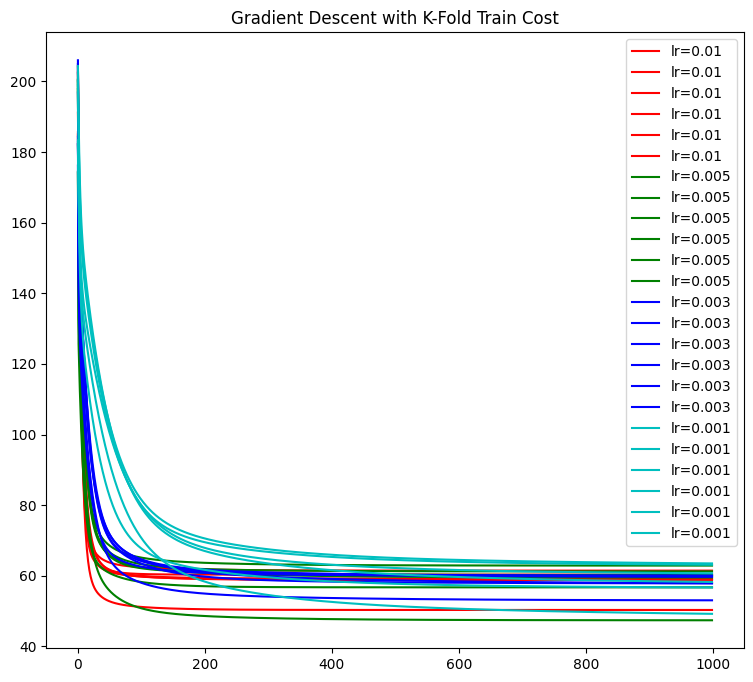

In [22]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_kfold_train_costs)):
    for j in range(len(gd_kfold_train_costs[i])):
        plt.plot(gd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

### K-Fold Cross-Validation with Stochastic Gradient Descent

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.4600
Iteration  200 | Loss = 58.2732
Iteration  300 | Loss = 58.2678


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 58.2689
Iteration  500 | Loss = 58.2694
Iteration  600 | Loss = 58.2695
Iteration  700 | Loss = 58.2696
Iteration  800 | Loss = 58.2696
Iteration  900 | Loss = 58.2696
Stopping criteria satisfied at iteration 966.
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5301.045751704607, RMSE: 72.8082807907494
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.8446
Iteration  200 | Loss = 63.2915
Iteration  300 | Loss = 63.1698


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 63.1386
Iteration  500 | Loss = 63.1305
Iteration  600 | Loss = 63.1285
Iteration  700 | Loss = 63.1280
Iteration  800 | Loss = 63.1279
Iteration  900 | Loss = 63.1279
Iteration 1000 | Loss = 63.1279
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1098.2518038913843, RMSE: 33.13988237594371
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.7869
Iteration  200 | Loss = 62.3899
Iteration  300 | Loss = 62.2787


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 62.2440
Iteration  500 | Loss = 62.2338
Iteration  600 | Loss = 62.2311
Iteration  700 | Loss = 62.2307
Iteration  800 | Loss = 62.2309
Iteration  900 | Loss = 62.2311
Iteration 1000 | Loss = 62.2313
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1742.2031689692842, RMSE: 41.73970734168226
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 49.0892


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 48.1183
Iteration  300 | Loss = 47.8409
Iteration  400 | Loss = 47.7537
Iteration  500 | Loss = 47.7259
Iteration  600 | Loss = 47.7170
Iteration  700 | Loss = 47.7140
Iteration  800 | Loss = 47.7130
Iteration  900 | Loss = 47.7127
Iteration 1000 | Loss = 47.7126
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 11082.621563475157, RMSE: 105.27403081232882
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.1644
Iteration  200 | Loss = 61.4868
Iteration  300 | Loss = 61.3133


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 61.2662
Iteration  500 | Loss = 61.2534
Iteration  600 | Loss = 61.2500
Iteration  700 | Loss = 61.2492
Iteration  800 | Loss = 61.2491
Iteration  900 | Loss = 61.2491
Iteration 1000 | Loss = 61.2491
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2657.802784635283, RMSE: 51.55388234299414
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.2114


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 56.4277
Iteration  300 | Loss = 56.2763
Iteration  400 | Loss = 56.2364
Iteration  500 | Loss = 56.2248
Iteration  600 | Loss = 56.2212
Iteration  700 | Loss = 56.2200
Iteration  800 | Loss = 56.2195
Iteration  900 | Loss = 56.2193
Iteration 1000 | Loss = 56.2193
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5419.808181064085, RMSE: 73.61934651342733
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 60.8364
Iteration  200 | Loss = 58.8416
Iteration  300 | Loss = 58.2609
Iteration  400 | Loss = 57.9847
Iteration  500 | Loss = 57.8386
Iteration  600 | Loss = 57.7592
Iteration  700 | Loss = 57.7156
Iteration  800 | Loss = 57.6915
Iteration  900 | Loss = 57.6782
Iteration 1000 | Loss = 57.6707
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4586.570020195809, RMSE: 67.7242203365665
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.0656
Iteration  200 | Loss = 60.7721


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 60.4222
Iteration  400 | Loss = 60.2383
Iteration  500 | Loss = 60.1310
Iteration  600 | Loss = 60.0675
Iteration  700 | Loss = 60.0297
Iteration  800 | Loss = 60.0072
Iteration  900 | Loss = 59.9936
Iteration 1000 | Loss = 59.9855
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3406.769191606687, RMSE: 58.367535425154685
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 64.1368
Iteration  200 | Loss = 62.5010
Iteration  300 | Loss = 62.0629
Iteration  400 | Loss = 61.8672
Iteration  500 | Loss = 61.7676
Iteration  600 | Loss = 61.7147
Iteration  700 | Loss = 61.6860
Iteration  800 | Loss = 61.6703
Iteration  900 | Loss = 61.6617
Iteration 1000 | Loss = 61.6568
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1902.279915488115, RMSE: 43.615134018917274
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 52.8286
Iteration  200 | Loss = 51.1790


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 50.6336
Iteration  400 | Loss = 50.3709
Iteration  500 | Loss = 50.2367
Iteration  600 | Loss = 50.1669
Iteration  700 | Loss = 50.1303
Iteration  800 | Loss = 50.1110
Iteration  900 | Loss = 50.1008
Iteration 1000 | Loss = 50.0953
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 10198.872926021611, RMSE: 100.98946938182026
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.6491


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 59.9871
Iteration  300 | Loss = 59.4573
Iteration  400 | Loss = 59.2036
Iteration  500 | Loss = 59.0742
Iteration  600 | Loss = 59.0068
Iteration  700 | Loss = 58.9712
Iteration  800 | Loss = 58.9523
Iteration  900 | Loss = 58.9421
Iteration 1000 | Loss = 58.9366
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3524.825623880219, RMSE: 59.37024190518529
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 62.1606
Iteration  200 | Loss = 61.2664
Iteration  300 | Loss = 61.1313
Iteration  400 | Loss = 61.1027
Iteration  500 | Loss = 61.0963
Iteration  600 | Loss = 61.0951
Iteration  700 | Loss = 61.0950
Iteration  800 | Loss = 61.0952
Iteration  900 | Loss = 61.0953
Iteration 1000 | Loss = 61.0954
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2791.5354898078485, RMSE: 52.83498357913863


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.8071
Iteration  200 | Loss = 59.4552
Iteration  300 | Loss = 58.8799
Iteration  400 | Loss = 58.6956
Iteration  500 | Loss = 58.6282
Iteration  600 | Loss = 58.6020
Iteration  700 | Loss = 58.5915
Iteration  800 | Loss = 58.5874
Iteration  900 | Loss = 58.5858
Iteration 1000 | Loss = 58.5852
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4682.991882836007, RMSE: 68.4323891358179
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.6672


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 59.7523
Iteration  300 | Loss = 58.6279
Iteration  400 | Loss = 58.1590
Iteration  500 | Loss = 57.9034
Iteration  600 | Loss = 57.7448
Iteration  700 | Loss = 57.6413
Iteration  800 | Loss = 57.5723
Iteration  900 | Loss = 57.5260
Iteration 1000 | Loss = 57.4949
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4585.409506204974, RMSE: 67.7156518554239
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 63.7166
Iteration  200 | Loss = 60.1200
Iteration  300 | Loss = 59.1629
Iteration  400 | Loss = 58.7855
Iteration  500 | Loss = 58.5958
Iteration  600 | Loss = 58.4886
Iteration  700 | Loss = 58.4241
Iteration  800 | Loss = 58.3839
Iteration  900 | Loss = 58.3583
Iteration 1000 | Loss = 58.3416
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4214.943885147591, RMSE: 64.9225991866283
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.9829
Iteration  200 | Loss = 63.3855
Iteration  300 | Loss = 62.7293


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 62.4165
Iteration  500 | Loss = 62.2210
Iteration  600 | Loss = 62.0876
Iteration  700 | Loss = 61.9940
Iteration  800 | Loss = 61.9276
Iteration  900 | Loss = 61.8802
Iteration 1000 | Loss = 61.8464
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1967.4935099897543, RMSE: 44.356437075014874
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.4294


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 62.1167
Iteration  300 | Loss = 61.1929
Iteration  400 | Loss = 60.7406
Iteration  500 | Loss = 60.4684
Iteration  600 | Loss = 60.2915
Iteration  700 | Loss = 60.1725
Iteration  800 | Loss = 60.0912
Iteration  900 | Loss = 60.0350
Iteration 1000 | Loss = 59.9960
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3039.002079655042, RMSE: 55.127144671704535
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 57.7564
Iteration  200 | Loss = 54.6299
Iteration  300 | Loss = 53.8095
Iteration  400 | Loss = 53.4297
Iteration  500 | Loss = 53.1961
Iteration  600 | Loss = 53.0401
Iteration  700 | Loss = 52.9340
Iteration  800 | Loss = 52.8615
Iteration  900 | Loss = 52.8120
Iteration 1000 | Loss = 52.7783
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 8143.687407010941, RMSE: 90.242381434728
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 48.2229
Iteration  200 | Loss = 41.6592
Iteration  300 | Loss = 40.3995


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 39.8877
Iteration  500 | Loss = 39.6303
Iteration  600 | Loss = 39.4867
Iteration  700 | Loss = 39.3991
Iteration  800 | Loss = 39.3414
Iteration  900 | Loss = 39.3012
Iteration 1000 | Loss = 39.2720
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 26661.35042293656, RMSE: 163.28303776858317
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 80.8319


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 68.9805
Iteration  300 | Loss = 65.9311
Iteration  400 | Loss = 64.4391
Iteration  500 | Loss = 63.5751
Iteration  600 | Loss = 63.0372
Iteration  700 | Loss = 62.6798
Iteration  800 | Loss = 62.4273
Iteration  900 | Loss = 62.2392
Iteration 1000 | Loss = 62.0931
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2186.837416326128, RMSE: 46.763633480794965
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 81.5993
Iteration  200 | Loss = 69.9248
Iteration  300 | Loss = 66.3994


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 64.6420
Iteration  500 | Loss = 63.6408
Iteration  600 | Loss = 63.0222
Iteration  700 | Loss = 62.6111
Iteration  800 | Loss = 62.3204
Iteration  900 | Loss = 62.1043
Iteration 1000 | Loss = 61.9374
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2262.556233682365, RMSE: 47.56633508777363
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 80.5398


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 67.8182
Iteration  300 | Loss = 64.6409
Iteration  400 | Loss = 63.2676
Iteration  500 | Loss = 62.5358
Iteration  600 | Loss = 62.1046
Iteration  700 | Loss = 61.8279
Iteration  800 | Loss = 61.6357
Iteration  900 | Loss = 61.4928
Iteration 1000 | Loss = 61.3808
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3361.130808120428, RMSE: 57.97526031093287
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 80.2229
Iteration  200 | Loss = 67.3666
Iteration  300 | Loss = 63.6697


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 61.7375
Iteration  500 | Loss = 60.5572
Iteration  600 | Loss = 59.7909
Iteration  700 | Loss = 59.2667
Iteration  800 | Loss = 58.8899
Iteration  900 | Loss = 58.6068
Iteration 1000 | Loss = 58.3861
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4259.6889453953245, RMSE: 65.26629256664825
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 81.9648


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 68.4323
Iteration  300 | Loss = 65.0799
Iteration  400 | Loss = 63.5573
Iteration  500 | Loss = 62.6901
Iteration  600 | Loss = 62.1432
Iteration  700 | Loss = 61.7686
Iteration  800 | Loss = 61.4935
Iteration  900 | Loss = 61.2800
Iteration 1000 | Loss = 61.1080
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3046.6587477382977, RMSE: 55.19654652003418


In [24]:
print(sgd_kfold_opt_model)

{'rmse': 63.0225216961876, 'lr': 0.01, 'w': array([-61.26963597,  83.51790189, 482.00726621, 405.44467516,
       183.50306435, -81.2298735 , 294.40586319])}


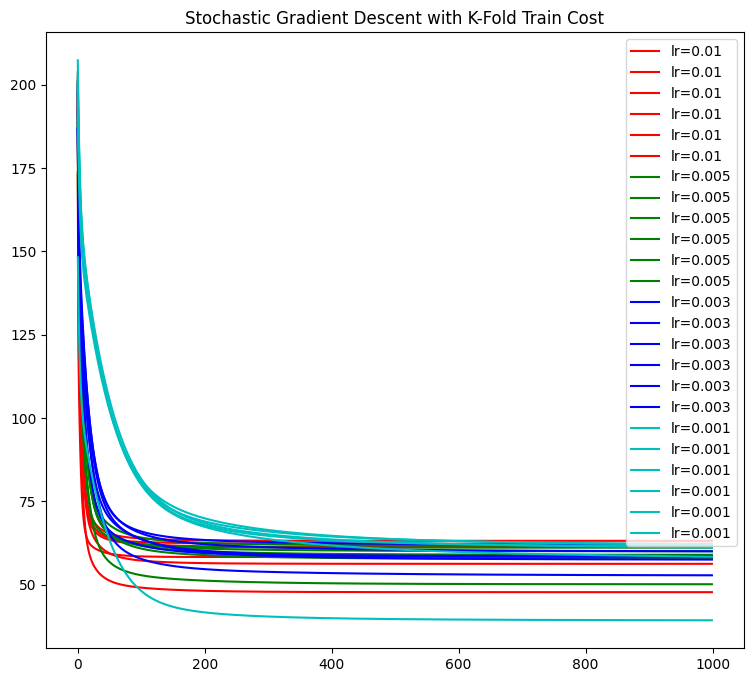

In [25]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_kfold_train_costs)):
    for j in range(len(sgd_kfold_train_costs[i])):
        plt.plot(sgd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')